In [ ]:
import os
import numpy as np
import pandas as pd

from astar import astar2d

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = []
for file in os.listdir("data/64_distance_100_0/"):
    if file=="scenarios.csv":
        continue

    scenario = pd.read_csv("data/64_distance_100_0/" + file)

    target_pos = eval(scenario.loc[0, "target_pos"])
    target_dir = scenario.loc[0, "target_dir"]
    target_state = (target_pos, target_dir)
    goal = eval(scenario.loc[0, "target_goal"])

    cost = np.zeros((64,64))
    result = astar2d(target_state, goal, cost)
    optimal_path = [int(v[0]) for v in result if v[0] is not None]
    # path = [v[1] for v in result]
    noised_path = scenario["target_action"].values.tolist()

    data.append({
        "scenario": file,
        "optimal_path": optimal_path,
        "noised_path": noised_path
    })

Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal

Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal Found!
Goal

In [3]:
data = pd.DataFrame(data)

In [7]:
data["accuracy"] = data.apply(
    lambda row: sum([row["optimal_path"][i]==row["noised_path"][i] 
                     for i in range(len(row["optimal_path"]))])/ len(row["optimal_path"]), axis=1
)
data["noise_len"] = data["noised_path"].apply(len)
data["optimal_len"] = data["optimal_path"].apply(len)
data["len_diff"] = (data["noise_len"] - data["optimal_len"]) / data["optimal_len"]

In [8]:
data

,scenario,optimal_path,noised_path,accuracy,noise_len,optimal_len,len_diff
0,layout5scenario0.csv,"[1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, ...",0.684211,32,19,0.684211
1,layout42scenario8.csv,"[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, ...",0.772727,31,22,0.409091
2,layout93scenario4.csv,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.000000,20,20,0.000000
3,layout18scenario9.csv,"[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, ...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, ...",0.695652,34,23,0.478261
4,layout63scenario3.csv,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, ...","[2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, ...",0.700000,54,40,0.350000
...,...,...,...,...,...,...,...
995,layout99scenario2.csv,"[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]","[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]",1.000000,10,10,0.000000
996,layout84scenario9.csv,"[0, 2, 2, 2, 2, 2, 2, 0, 2, 2]","[0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2]",0.600000,13,10,0.300000
997,layout30scenario8.csv,"[1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, ...",0.702703,52,37,0.405405
998,layout67scenario5.csv,"[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, ...",0.666667,53,36,0.472222


(0.0, 1.01)

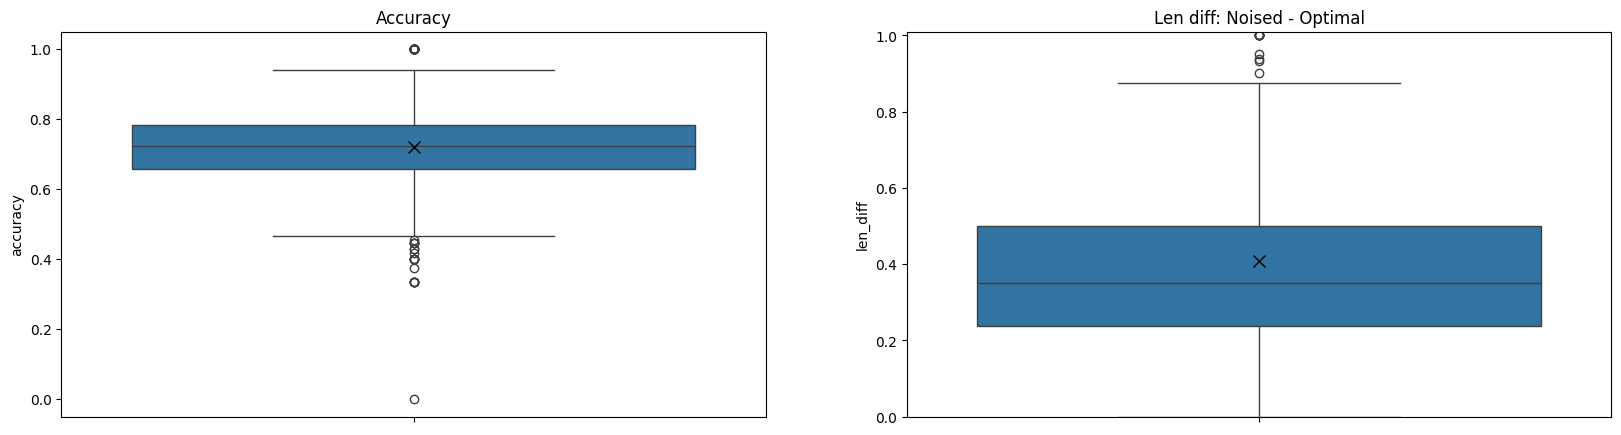

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))



sns.boxplot(data=data, y='accuracy', ax=axes[0], showmeans=True,  
        meanprops={'marker':'x',
                'markerfacecolor':'yellow', 
                'markeredgecolor':'black',
                'markersize':'8'})
axes[0].set_title(f'Accuracy')

sns.boxplot(data=data, y='len_diff', ax=axes[1], showmeans=True,  
        meanprops={'marker':'x',
                'markerfacecolor':'yellow', 
                'markeredgecolor':'black',
                'markersize':'8'})
axes[1].set_title(f'Len diff: Noised - Optimal')
axes[1].set_ylim(0, 1.01)